In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

Importing MAGIC Data (from: https://archive.ics.uci.edu/dataset/159/magic+gamma+telescope )

In [2]:
cols = ["fLength", "fWidth", "fSize", "fConc", "fConc1", "fAsym", "fM3Long", "fM3Trans", "fAlpha", "fDist", "class"]
df = pd.read_csv("/kaggle/input/magic-gamma-telescope-data-sheet/magic04.data", names=cols)
df.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


Chnage the g (gamma signal) to 1 and h (hadron signal) to 0 

In [3]:
df['class'] = df['class'].map({'g':1, 'h':0})

Check the list hadder agian

In [4]:
df.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,1
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,1
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,1
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,1
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,1


Try to visualize the corelation between features and output lebel (if exists any)

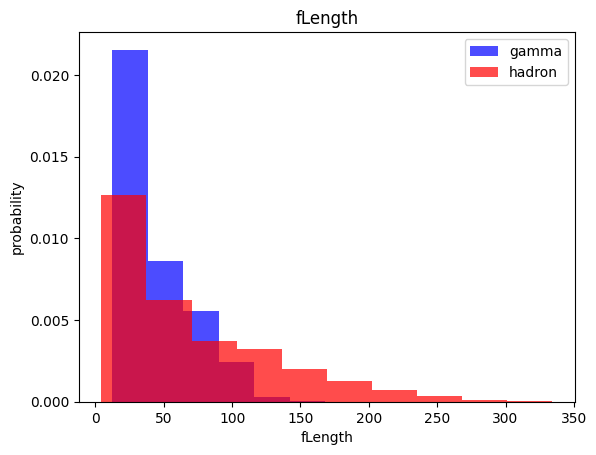

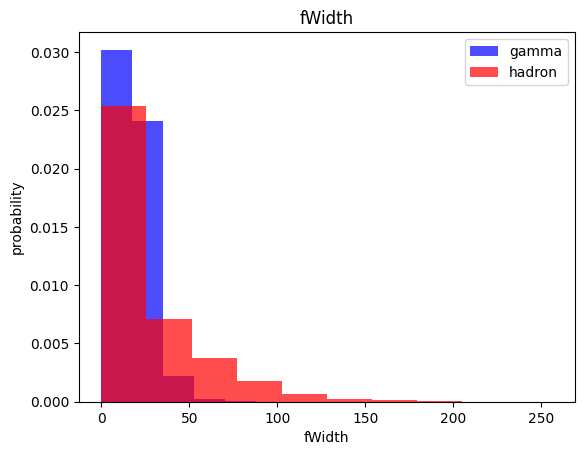

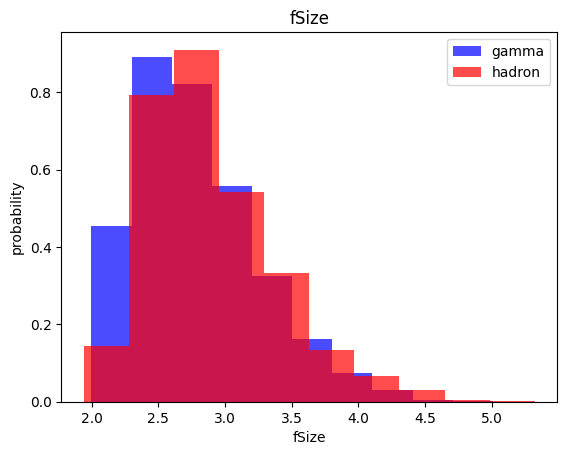

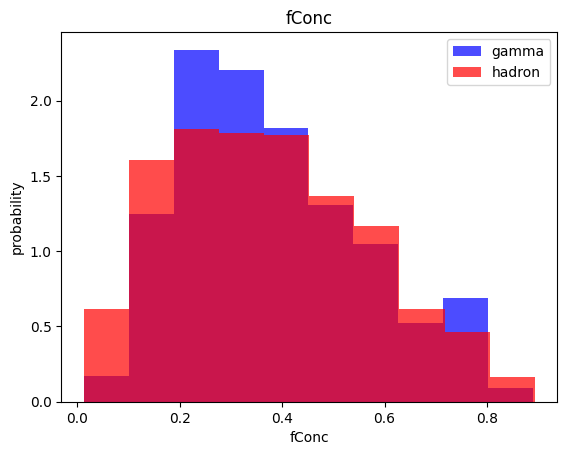

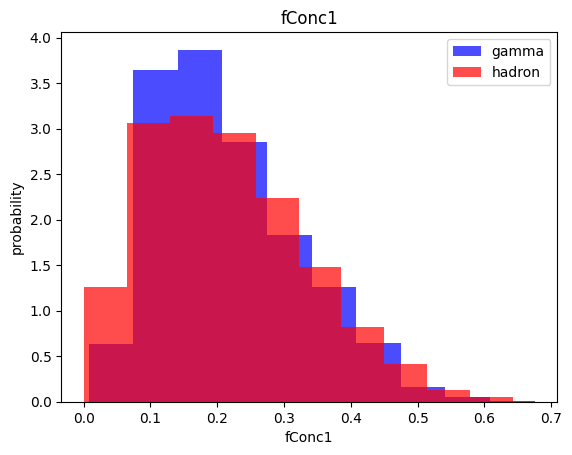

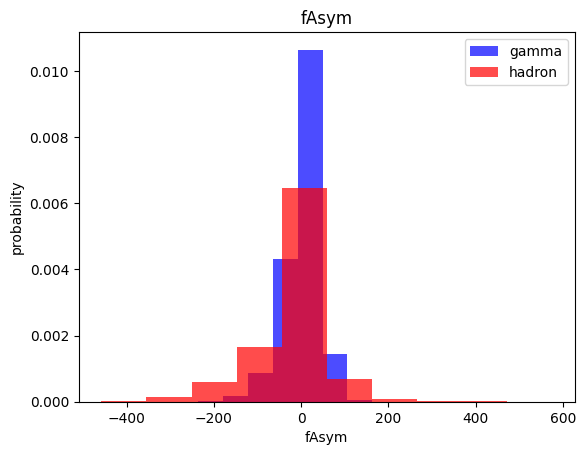

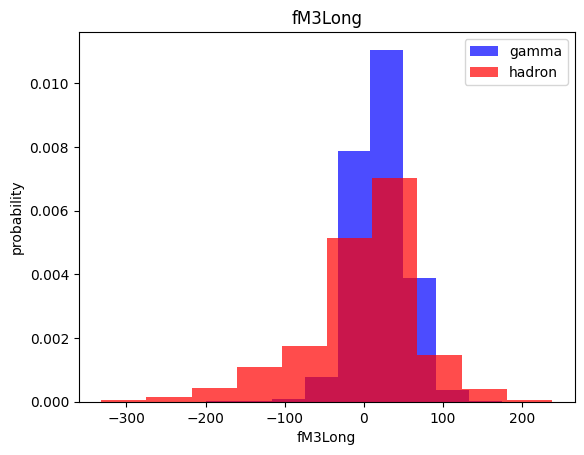

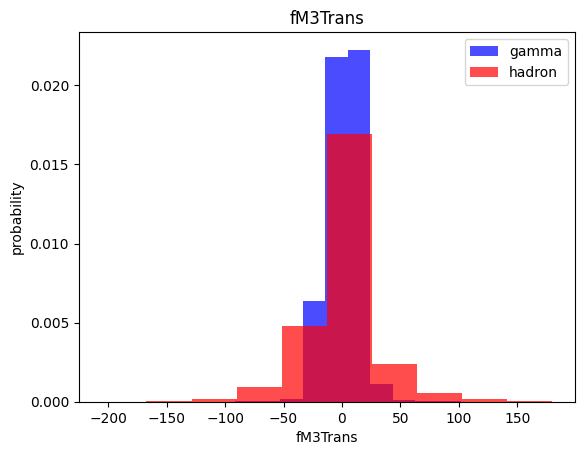

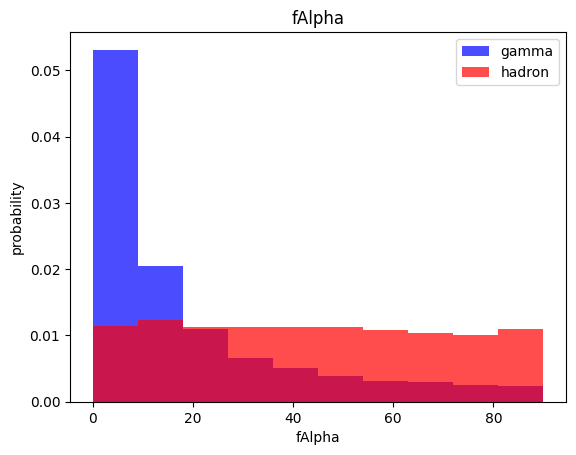

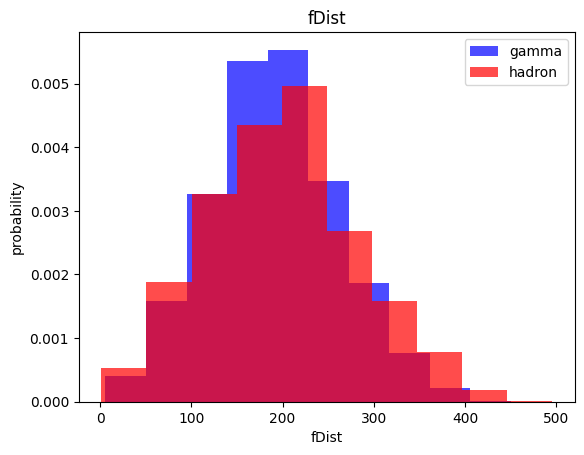

In [5]:
for label in cols[:-1]:
  plt.hist(df[df["class"]==1][label],color = 'blue', label ='gamma', alpha = 0.7, density =True)
  plt.hist(df[df["class"]==0][label],color = 'red', label ='hadron', alpha = 0.7, density =True)
  plt.title(label)
  plt.ylabel("probability")
  plt.xlabel(label)
  plt.legend()
  plt.show()

**Creat Train, validation, and test data sets**

In [6]:
train, valid, test = np.split(df.sample(frac = 1), [int(0.6*len(df)), int(0.8*len(df))])

/opt/conda/lib/python3.10/site-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


Printing the length of different class in the training deta sets 

In [7]:
print(len(train[train["class"]==1]))
print(len(train[train["class"]==0]))

7358
4054


Creat a function which induce random data (oversampled) of hadron class to remove bias

In [8]:
def scale_dataset(dataframe, oversample=False):
  x = dataframe[dataframe.columns[:-1]].values
  y = dataframe[dataframe.columns[-1]].values

  scaler = StandardScaler()
  x = scaler.fit_transform(x)

  if oversample:
    ros = RandomOverSampler()
    x , y = ros.fit_resample(x,y)


  data = np.hstack((x,np.reshape(y,(-1,1))))
  return data , x, y

Oversampleing the data

In [9]:
train, X_train, y_train = scale_dataset(train, oversample=True)

In [10]:
len(y_train)

14716

In [11]:
sum(y_train == 1)

7358

In [12]:
# train, X_train, y_train = scale_dataset(train, oversample=True)
valid, X_valid, y_valid = scale_dataset(valid, oversample=False)
test, X_test, y_test = scale_dataset(test, oversample=False)

# **k-nearest neighbour**

In [13]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [14]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [15]:
y_pred = knn_model.predict(X_test)

In [16]:
y_pred

array([0, 0, 0, ..., 1, 1, 1])

In [17]:
y_test

array([1, 0, 0, ..., 1, 1, 1])

In [18]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.72      0.75      0.74      1278
           1       0.87      0.86      0.86      2526

    accuracy                           0.82      3804
   macro avg       0.80      0.80      0.80      3804
weighted avg       0.82      0.82      0.82      3804



**Naive Bayes**

In [19]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report

In [20]:
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

GaussianNB()

In [21]:
y_pred1 = nb_model.predict(X_test)
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.65      0.42      0.51      1278
           1       0.75      0.89      0.81      2526

    accuracy                           0.73      3804
   macro avg       0.70      0.65      0.66      3804
weighted avg       0.72      0.73      0.71      3804



**Logistics** **Regression**

In [22]:
from sklearn.linear_model import LogisticRegression

In [23]:
lg_model = LogisticRegression()
lg_model = lg_model.fit(X_train,y_train)

In [24]:
y_pred2 = nb_model.predict(X_test)
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.65      0.42      0.51      1278
           1       0.75      0.89      0.81      2526

    accuracy                           0.73      3804
   macro avg       0.70      0.65      0.66      3804
weighted avg       0.72      0.73      0.71      3804



**Support Vector Machine (SVM)**

In [25]:
from sklearn.svm  import SVC

In [26]:
svm_model=SVC()
svm_model=svm_model.fit(X_train, y_train)

In [27]:
y_pred3 = svm_model.predict(X_test)
print(classification_report(y_test, y_pred3))

              precision    recall  f1-score   support

           0       0.79      0.81      0.80      1278
           1       0.90      0.89      0.90      2526

    accuracy                           0.86      3804
   macro avg       0.84      0.85      0.85      3804
weighted avg       0.86      0.86      0.86      3804



SVM produce really good result so far

# **Neural Network**

In [28]:
import tensorflow as tf
import numpy as np
import keras

2024-05-29 11:44:13.728913: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-29 11:44:13.729065: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-29 11:44:13.909918: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [29]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.xlabel('Epoch')
  plt.ylabel('Binary crossentropy')
  plt.legend()
  plt.grid(True)
  plt.show()

def plot_accuracy(history):
  plt.plot(history.history['accuracy'], label='accuracy')
  plt.plot(history.history['val_accuracy'], label='val_accuracy')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.legend()
  plt.grid(True)
  plt.show()


In [30]:
nn_model = tf.keras.Sequential([
      tf.keras.layers.Dense(64, activation='relu', input_shape=(10,)),
      tf.keras.layers.Dense(32, activation='relu'),
      tf.keras.layers.Dense(1,  activation='sigmoid')
  ])

nn_model.compile(optimizer=tf.keras.optimizers.Adam(0.001), loss='binary_crossentropy', metrics=['accuracy'])

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Traning the Neural network

In [31]:
history = nn_model.fit(
    X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=0
)

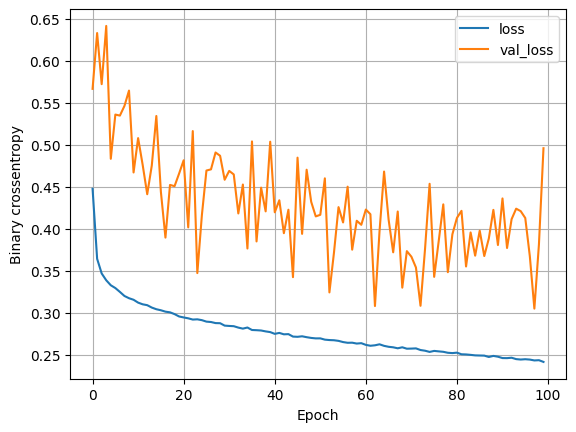

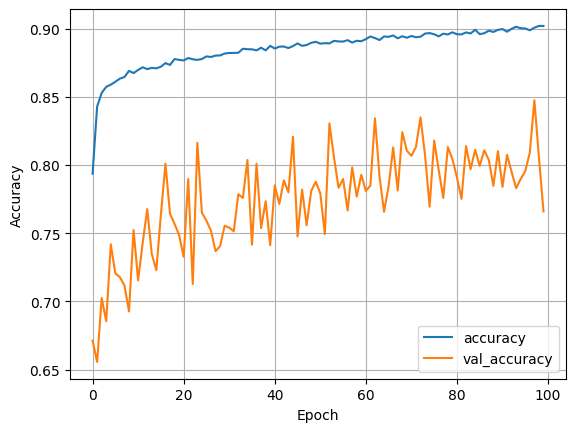

In [32]:
plot_loss(history)
plot_accuracy(history)